# Bob Ross Episodes 

#### data from Kaggle.com
https://www.kaggle.com/tbass134/bob-ross-episodes

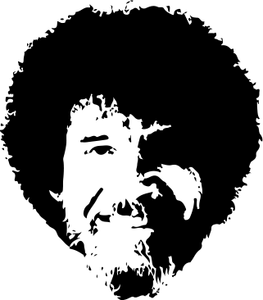

## Import packages 

In [244]:
import pandas as pd
from __future__ import division
import numpy as np 
from nltk.corpus import stopwords
import nltk

## Read in episode transcrips 

In [245]:
df = pd.read_csv('C://Users//Paul//Desktop//Rockhurst//BIA 6304-Text Mining//Homework 2//bob_ross_episodes.csv')
print(type(df))
print(list(df)) #headers, 'transcript' contains the episode text

<class 'pandas.core.frame.DataFrame'>
['Unnamed: 0', 'etag', 'id', 'kind', 'snippet.channelId', 'snippet.channelTitle', 'snippet.description', 'snippet.playlistId', 'snippet.position', 'snippet.publishedAt', 'snippet.resourceId.kind', 'snippet.resourceId.videoId', 'snippet.thumbnails.default.height', 'snippet.thumbnails.default.url', 'snippet.thumbnails.default.width', 'snippet.thumbnails.high.height', 'snippet.thumbnails.high.url', 'snippet.thumbnails.high.width', 'snippet.thumbnails.maxres.height', 'snippet.thumbnails.maxres.url', 'snippet.thumbnails.maxres.width', 'snippet.thumbnails.medium.height', 'snippet.thumbnails.medium.url', 'snippet.thumbnails.medium.width', 'snippet.thumbnails.standard.height', 'snippet.thumbnails.standard.url', 'snippet.thumbnails.standard.width', 'snippet.title', 'transcript']


#### In this csv file the episode transcripts are located under 'transcripts'. These are whole episode transcripts detailing what Bob Ross was saying while hosting his TV show The Joy of Painting

# T1

# Previewing the 1st episode transcript 

In [246]:
pd.set_option('display.max_colwidth', 1500)
df['transcript'].head(1) #looking at the first episode transcript to see how the text looks 

0    (mellow smooth jazz music) - Hello, I'm Bob Ross\nand I'd like to welcome you to the 29th Joy of Painting series. If this is your first time with us, allow me to extend a personal invitation for you to get your\nbrushes and your paints and paint along with us each show. And if you've been with us before, please allow me to thank\nyou for inviting us back for another series of painting shows. We'll use about a dozen colors, some unorthodox brushes, and each show I'll show you how to put some of nature's masterpieces right here on the canvas. So, I'll tell you what, let's get started. Today, we'll have 'em run all the colors across the screen, right there, that you need to paint along with us. While they're doing that, let me tell you what I've got going on up here. Today, I'm using an 18 by 24 inch, double-primed, pre-stretched canvas, but you use whatever size you'd like. And I've just covered the entire canvas with a very thin coat of liquid white. Liquid white is designed just t

#### Looking at the 1st episode we can see one potential issue within the text.  In the text we see '\n', this python sting literal represents a line break and could potnetially effect the analysis later on down the line. 

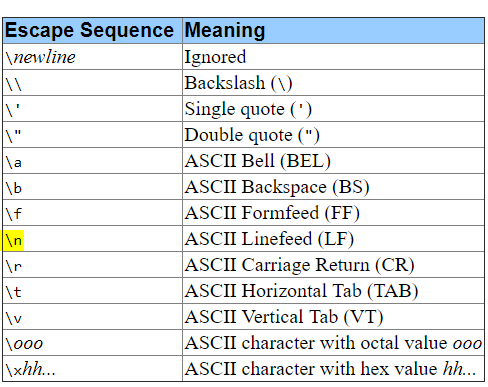

### Removing the \n and replacing with a space (' ')

In [247]:
df = df.replace('\n', ' ', regex = True)

#### checking to make sure it is removed 

In [248]:
df['transcript'].head(1)

0    (mellow smooth jazz music) - Hello, I'm Bob Ross and I'd like to welcome you to the 29th Joy of Painting series. If this is your first time with us, allow me to extend a personal invitation for you to get your brushes and your paints and paint along with us each show. And if you've been with us before, please allow me to thank you for inviting us back for another series of painting shows. We'll use about a dozen colors, some unorthodox brushes, and each show I'll show you how to put some of nature's masterpieces right here on the canvas. So, I'll tell you what, let's get started. Today, we'll have 'em run all the colors across the screen, right there, that you need to paint along with us. While they're doing that, let me tell you what I've got going on up here. Today, I'm using an 18 by 24 inch, double-primed, pre-stretched canvas, but you use whatever size you'd like. And I've just covered the entire canvas with a very thin coat of liquid white. Liquid white is designed just to m

# Looking deeper at the transcript corpus 

In [249]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=False, stop_words = 'english', min_df=.10, ngram_range= (1,2)) 
cv_dm = cv.fit_transform(df['transcript'].values.astype('U'))
print(cv_dm.shape)
names = cv.get_feature_names()   
count = np.sum(cv_dm.toarray(), axis = 0) 
count2 = count.tolist() 
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:19] 

(403, 1723)


,count
little,27674
just,20633
right,10729
let,9804
ll,9754
brush,7606
maybe,7192
like,6706
want,5164
bit,5127


#### The word count looks about like you would think it would for a show about painting. Words like "brush", "paint", and color names would be common. It seems Bob Ross also loved the word "little": eg "Happy Little Clouds". Some consideration could be made for removing more stop words if desired. In this case we will proceed with the stop words as it.

## Isolating one episode 

In [250]:
episode_1 = df[0:1][['transcript']]
print(episode_1['transcript'])

0    (mellow smooth jazz music) - Hello, I'm Bob Ross and I'd like to welcome you to the 29th Joy of Painting series. If this is your first time with us, allow me to extend a personal invitation for you to get your brushes and your paints and paint along with us each show. And if you've been with us before, please allow me to thank you for inviting us back for another series of painting shows. We'll use about a dozen colors, some unorthodox brushes, and each show I'll show you how to put some of nature's masterpieces right here on the canvas. So, I'll tell you what, let's get started. Today, we'll have 'em run all the colors across the screen, right there, that you need to paint along with us. While they're doing that, let me tell you what I've got going on up here. Today, I'm using an 18 by 24 inch, double-primed, pre-stretched canvas, but you use whatever size you'd like. And I've just covered the entire canvas with a very thin coat of liquid white. Liquid white is designed just to m

#### we will remove min_df so that we dont run the risk of removing all words

In [251]:
cv = CountVectorizer(binary=False, stop_words = 'english', ngram_range = (1,2)) 
cv_dm = cv.fit_transform(episode_1['transcript'].values.astype('U'))
print(cv_dm.shape)
names = cv.get_feature_names()   
count = np.sum(cv_dm.toarray(), axis = 0) 
count2 = count.tolist() 
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:19] 

(1, 1913)


,count
little,129
just,72
ll,53
let,48
brush,41
right,34
like,31
make,27
color,21
tree,20


#### just like before "little" takes the top spot. More colors are present and the word "trees" makes an appearance

# T2

# Diving into episode sentiment analysis

 Creation of sentiment dictionary 'afinn'


In [252]:
afinn = {}
for line in open('C:\\Users\\Paul\\Desktop\\Rockhurst\\BIA 6304-Text Mining\\Week 4\\AFINN-111.txt'):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})


print(type(afinn), len(afinn))

for key, value in sorted(afinn.items())[0:10]:
    print(key + " => " + str(value))
print("~~~~~~~~~~~~")
for key, value in sorted(afinn.items())[2467:]:
    print(key + " => " + str(value))

<class 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
abductions => -2
abhor => -3
abhorred => -3
abhorrent => -3
abhors => -3
~~~~~~~~~~~~
yeah => 1
yearning => 1
yeees => 2
yes => 1
youthful => 2
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


#### This dictionary uses a scoring method to determine how positive or negative a corpus is. Words are assigned a score based on how positive or negative a word is. This adds 'weights' to the to the words vs just counting how many positive words or negative words there are. *This type of score could give more weight to episodes with more words*

## Defining the terms of the dictionary 

#### For this analysis we will be classifying any corpus with a score of less than 0 as negative, greater than 0 as positive, and any with a score of 0 as neutral

In [253]:
def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment

### For ease of use we will isolate the transcript into its own dataframe 

In [254]:
pd.set_option('display.max_colwidth', 500)
transcript['transcript']= df['transcript'].fillna("")
                                                 
transcript.head(1) #shows one episode 
print(type(transcript))
transcript.head(3)

<class 'pandas.core.series.Series'>


0    (mellow smooth jazz music) - Hello, I'm Bob Ross and I'd like to welcome you to the 29th Joy of Painting series. If this is your first time with us, allow me to extend a personal invitation for you to get your brushes and your paints and paint along with us each show. And if you've been with us before, please allow me to thank you for inviting us back for another series of painting shows. We'll use about a dozen colors, some unorthodox brushes, and each show I'll show you how to put some of ...
1    (instrumental music) - Hello, I'm Bob Ross, and I'd like to welcome you to the 20th Joy of Painting series. Son of a gun, it's hard for me to believe this is the 20th series, but it is, and I'd like to thank you very much for inviting me back for another series of painting shows. If this is your first time with us, let me extend a personal invitation for you to drag out your brushes and your paints and paint along with us each show. I think you'll enjoy it. Tell you what, let's start o

### Apply the dictionary 

In [255]:
transcript['afinn'] = transcript.transcript.apply(lambda x: afinn_sent(x))
transcript.shape #409 episodes 

(409,)

# View the dataframe

In [256]:
pd.set_option('display.max_colwidth', 100)
transcript.head(15)

0     (mellow smooth jazz music) - Hello, I'm Bob Ross and I'd like to welcome you to the 29th Joy of ...
1     (instrumental music) - Hello, I'm Bob Ross, and I'd like to welcome you to the 20th Joy of Paint...
2     - Hi, welcome back. Certainly glad you could join us today because today is a very special day f...
3     - Welcome back. Awful glad you could join me today. Today I thought we'd do a beautiful little s...
4     - Hi, I'm Bob Ross, and for the next 13 weeks, I'll be your host, as we experience The Joy of Pa...
5                                                                                                        
6     - Welcome back. Glad to see ya today. You know in every series, there has to be a crazy day, and...
7     (bright music) - Hello, I'm Bob Ross and I'd like to welcome you to the 21st Joy of Painting ser...
8     - Welcome back, glad to see you again. Thought today we'd do just a happy little picture that's ...
9     (upbeat music) - Hello I'm Bob Ross and 

## Something not considered before: Empty Rows

In [257]:
pd.set_option('display.max_colwidth', 100)

x = transcript['transcript']
y = transcript['afinn']

df = pd.concat([y,x], axis =1)
df.columns = ['afinn', 'transcript'] 
df.tail(10)

,afinn,transcript
393,Neutral,
394,Neutral,
395,Positive,"- Hi, welcome back. Certainly glad to see you today. I thought today we'd do something that's a ..."
396,Positive,"- Hi, welcome back, certainly glad you could join us today. Thought today we'd just do a little ..."
397,Neutral,
398,Positive,"- Hi, welcome back. Certainly glad you could join us today because today is the last show of the..."
399,Neutral,
400,Neutral,
401,Neutral,
402,Neutral,


#### Something we did not notice before was this this data set contains some blank rows where the episode's transcript is not availible. For these episodes the dictionary will label them as "Neutral" because they do not contain  scores. This will need to be dealt with later on.

### Removing blank rows

In [258]:
df = df[df['transcript']!='']

In [259]:
df.tail(10)

,afinn,transcript
381,Positive,"- Hi, welcome back. Certainly glad you could join us today, 'cause it's a fantastic day here and..."
382,Positive,"- Hi, welcome back. Certainly glad you could join us today, and I thought today we'd maybe do so..."
383,Positive,"(easygoing instrumental music) - Hi, welcome back. Certainly glad you could join us today. It's ..."
386,Positive,"- Hi, welcome back. Certainly glad to see you today, and I hope you're having a wonderful day. S..."
388,Positive,"(gentle music) - Welcome back, I'm glad to see you today, glad you could join me. And today I th..."
389,Positive,"- Hi, welcome back, glad you could join us today. I thought today we'd just do a painting that's..."
391,Positive,"- Hi, welcome back. Certainly glad you could join us today. It's a fantastic day here and I hope..."
395,Positive,"- Hi, welcome back. Certainly glad to see you today. I thought today we'd do something that's a ..."
396,Positive,"- Hi, welcome back, certainly glad you could join us today. Thought today we'd just do a little ..."
398,Positive,"- Hi, welcome back. Certainly glad you could join us today because today is the last show of the..."


In [260]:
df.afinn.value_counts()

Positive    248
Neutral       1
Name: afinn, dtype: int64

#### We now have 249 complete transcripts

# Creating Sentiment Score 

 Looking deeper at the results of the applied dictionary we see that almost all of the trasncripts were labeled as "positive". We decided it would be a good idea to look at what the individuals sentiment scores look like.

## Creating the sentiment score

In [261]:
def afinn_sentscore(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentscore + afinn[word.rstrip('?:!.,;')]
    

    return sentscore

### applying score to dataset 

In [262]:
transcript['afinn_sentscore'] = transcript.transcript.apply(lambda x: afinn_sentcount(x))

### viewing score

In [263]:
x = transcript['transcript']
y = transcript['afinn']
z = transcript['afinn_sentscore']

df = pd.concat([y,z,x], axis =1)
df.columns = ['afinn','afinn_sentscore', 'transcript'] 

df = df[df['transcript']!='']
df = df.sort_values(by=['afinn_sentscore'], ascending = False) #sort by afinn score

df.head(10) #top 10 

,afinn,afinn_sentscore,transcript
254,Positive,359,"- Hi, welcome back. I'm glad to see you today. I'm very glad you could join me. Today, I think w..."
251,Positive,354,"- Hi, welcome back. Certainly glad you could join us today. Let's do a fantastic little painting..."
31,Positive,353,"- Hi, welcome back. Certainly glad you could join me today cause it's a fantastic day here, and ..."
95,Positive,338,"- Hi, welcome back. Glad to see you today. You know, I get a lot of letters from people saying h..."
163,Positive,332,Hi. Welcome. Certainly glad to see ya again. Today I thought we'd do a fantastic little painting...
239,Positive,328,"- Hi, welcome back. Certainly glad you could join us today. It's a fantastic day here. And I hop..."
287,Positive,325,"(calming music) - Hi, welcome back. Certainly glad you could join us today. I thought today we'd..."
284,Positive,321,"(soothing, gentle music) - Hello, I'm glad you could join me today. And today, we're gonna do so..."
326,Positive,319,"- Hi, welcome back. I'm certainly glad you could join me today. I thought today we'd just do a f..."
381,Positive,319,"- Hi, welcome back. Certainly glad you could join us today, 'cause it's a fantastic day here and..."


In [264]:
df.tail(10) #bottom 10

,afinn,afinn_sentscore,transcript
30,Positive,117,"- Hello, glad to see you again. Thought today we'd do a picture that's right straight out of Ala..."
319,Positive,117,"- Welcome back. I'm glad you could join me today. And today, I thought I would do something that..."
29,Positive,109,"- Hello, glad to see you again. This being the last show of the series, we decided to devote it ..."
241,Positive,105,"- Well hello, hope you have your canvas set up and ready to go, I think we'll do another almight..."
186,Positive,104,"- Welcome back, hope you have your canvas set up on your almighty easel and you're ready to pain..."
144,Positive,103,- Hi. Welcome back. Certainly glad you could join us today because today is a very special day. ...
140,Positive,103,"- Hello, welcome back. I thought today, we'd do an almighty picture that had some huge mountains..."
89,Positive,99,"- Hello, glad to see you again. Today I thought we'd do an almighty winter picture and I want to..."
181,Positive,56,- Welcome back. Today I'd thought we'd do a little picture that's little different than what we'...
184,Neutral,0,HI. WELCOME BACK. CERTAINLY GLAD YOU COULD JOIN US TODAY. I THOUGHT TODAY WE'D DO SOMETHING DIFF...


#### using this view we can see what episodes have the highest positive sentimate and which have the lowest. 

## Top and Bottom scored episodes 
    Does Afinn favor a corpus with more words? 

In [265]:
top_episode = df[0:1] # top scoring episode 
top_episode

,afinn,afinn_sentscore,transcript
254,Positive,359,"- Hi, welcome back. I'm glad to see you today. I'm very glad you could join me. Today, I think w..."


In [266]:
cv = CountVectorizer(binary=False, stop_words = 'english', ngram_range = (1,2)) 
cv_dm = cv.fit_transform(top_episode['transcript'].values.astype('U'))
print(cv_dm.shape)
names = cv.get_feature_names()   
count = np.sum(cv_dm.toarray(), axis = 0) 
count2 = count.tolist() 
print(sum(count2))
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:10] 

(1, 1654)
3601


,count
little,111
just,78
maybe,71
let,65
right,55
brush,43
ll,39
scratchy,39
gentle,39
gentle scratchy,37


#### top 10 words by count, and 3,601 words tokenized 

In [267]:
bottom_episode = df[247:248] # lowest score
bottom_episode

,afinn,afinn_sentscore,transcript
181,Positive,56,- Welcome back. Today I'd thought we'd do a little picture that's little different than what we'...


In [268]:
cv = CountVectorizer(binary=False, stop_words = 'english', ngram_range = (1,2)) 
cv_dm = cv.fit_transform(bottom_episode['transcript'].values.astype('U'))
print(cv_dm.shape)
names = cv.get_feature_names()   
count = np.sum(cv_dm.toarray(), axis = 0) 
count2 = count.tolist() 
print(sum(count2))
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:10] 

(1, 1131)
1997


,count
little,99
just,55
ll,30
let,29
right,28
okay,26
little bit,24
bit,24
maybe,18
like,16


#### top 10 words and only 1,997 using the same tokenizer. While this is not a true word count it would indicate that the bottom scoring episode has few non-neutral words (assuming that most stop words are neutral)

# New Dictionary 

 In order to see how different dictionaries perform we are going to apply another dictionary call HL. This dictionary does a count of positive and negative words and creates a ratio to determine if a corpus is has positive or negative sentiment. Because we are using a count there is no weighting of words applied.

In [269]:
pathname = "C:\\Users\\Paul\\Desktop\\Rockhurst\\BIA 6304-Text Mining\\Week 4\\"
HLpos = [line.strip() for line in  open(pathname+'HLpos.txt','r')]
HLneg = [line.strip() for line in  open(pathname +'HLneg.txt','r',encoding = 'latin-1')]


def hl_sent(inputstring):

    poscount = 0
    negcount = 0
    
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
     
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

### apply the dictionary 

In [270]:
transcript['hlsent'] = transcript.transcript.apply(lambda x: hl_sent(x))

### View dataset

In [271]:
x = transcript['transcript']
y = transcript['afinn']
z = transcript['afinn_sentscore']
a = transcript['hlsent']

df = pd.concat([y,z,a,x], axis =1)
df.columns = ['afinn','afinn_sentscore', 'hlsent', 'transcript'] 

df = df[df['transcript']!='']
df = df.sort_values(by=['afinn_sentscore'], ascending = False)

df.tail(10)

,afinn,afinn_sentscore,hlsent,transcript
30,Positive,117,Positive,"- Hello, glad to see you again. Thought today we'd do a picture that's right straight out of Ala..."
319,Positive,117,Positive,"- Welcome back. I'm glad you could join me today. And today, I thought I would do something that..."
29,Positive,109,Positive,"- Hello, glad to see you again. This being the last show of the series, we decided to devote it ..."
241,Positive,105,Positive,"- Well hello, hope you have your canvas set up and ready to go, I think we'll do another almight..."
186,Positive,104,Positive,"- Welcome back, hope you have your canvas set up on your almighty easel and you're ready to pain..."
144,Positive,103,Positive,- Hi. Welcome back. Certainly glad you could join us today because today is a very special day. ...
140,Positive,103,Positive,"- Hello, welcome back. I thought today, we'd do an almighty picture that had some huge mountains..."
89,Positive,99,Positive,"- Hello, glad to see you again. Today I thought we'd do an almighty winter picture and I want to..."
181,Positive,56,Positive,- Welcome back. Today I'd thought we'd do a little picture that's little different than what we'...
184,Neutral,0,Neutral,HI. WELCOME BACK. CERTAINLY GLAD YOU COULD JOIN US TODAY. I THOUGHT TODAY WE'D DO SOMETHING DIFF...


## Creating HL-Score 

#### unlilke affin this score is a ratio. The ratio is ((posistive count - negative count)/(posistive count + negative count)). If the ratio is > 0 it is classifed as positive and if < 0 then it is negative.   

In [272]:
def hl_sentscore(inputstring):

    poscount = 0
    negcount = 0
    
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
     
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    
    
    return t

## apply dictionary and view dataset. Still sorting by affin score

In [273]:
transcript['hl_sentscore'] = transcript.transcript.apply(lambda x: hl_sentscore(x))

x = transcript['transcript']
y = transcript['afinn']
z = transcript['afinn_sentscore']
a = transcript['hlsent']
b = transcript['hl_sentscore']

df = pd.concat([y,z,a,b,x], axis =1)
df.columns = ['afinn','afinn_sentscore','hlsent' ,'hl_sentscore', 'transcript'] 

df = df[df['transcript']!='']
df = df.sort_values(by=['afinn_sentscore'], ascending = False)
df = df.reset_index()

df.head(20)

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
0,254,Positive,359,Positive,0.410526,"- Hi, welcome back. I'm glad to see you today. I'm very glad you could join me. Today, I think w..."
1,251,Positive,354,Positive,0.592308,"- Hi, welcome back. Certainly glad you could join us today. Let's do a fantastic little painting..."
2,31,Positive,353,Positive,0.447811,"- Hi, welcome back. Certainly glad you could join me today cause it's a fantastic day here, and ..."
3,95,Positive,338,Positive,0.634921,"- Hi, welcome back. Glad to see you today. You know, I get a lot of letters from people saying h..."
4,163,Positive,332,Positive,0.634483,Hi. Welcome. Certainly glad to see ya again. Today I thought we'd do a fantastic little painting...
5,239,Positive,328,Positive,0.557377,"- Hi, welcome back. Certainly glad you could join us today. It's a fantastic day here. And I hop..."
6,287,Positive,325,Positive,0.639640,"(calming music) - Hi, welcome back. Certainly glad you could join us today. I thought today we'd..."
7,284,Positive,321,Positive,0.612613,"(soothing, gentle music) - Hello, I'm glad you could join me today. And today, we're gonna do so..."
8,326,Positive,319,Positive,0.633188,"- Hi, welcome back. I'm certainly glad you could join me today. I thought today we'd just do a f..."
9,381,Positive,319,Positive,0.517510,"- Hi, welcome back. Certainly glad you could join us today, 'cause it's a fantastic day here and..."


## Sort by hl_score

### with this view we can see how the 2 dictionaries match up with scoring. Because of the lack of weights in the 2nd dictionary the 2 models seem to disagree s to what the top positive episodes are. 

In [274]:
df = df.sort_values(by=['hl_sentscore'], ascending = False)
df.head(20)

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
208,236,Positive,198,Positive,0.777778,"- Welcome back. So very glad you could join us today. You know in past shows, I've asked you to ..."
92,15,Positive,263,Positive,0.741627,"- Hi, welcome back. Certainly glad you could join us today. I thought today I'd show you a littl..."
219,4,Positive,182,Positive,0.724638,"- Hi, I'm Bob Ross, and for the next 13 weeks, I'll be your host, as we experience The Joy of Pa..."
132,209,Positive,245,Positive,0.717391,"- Welcome back, I'm awful glad to see you today. Today, let's do something that's bright and shi..."
222,300,Positive,175,Positive,0.703226,"- Welcome back, I'm glad to see you today. Today I think we'll do a canvas that's vertical, and ..."
121,370,Positive,248,Positive,0.687204,- Welcome back. Glad you could join me today. And today I thought we'd do the little painting th...
20,137,Positive,310,Positive,0.686099,"- Welcome back, I'm glad you could join me today. Today we're going to do something that's quite..."
44,99,Positive,285,Positive,0.685590,"Hi, welcome back. Certainly glad you could join us today, for this is the last show of the 22nd ..."
136,34,Positive,243,Positive,0.683616,"(relaxing music) - Welcome back. Well, today I have a special treat for you. You know in the fir..."
25,233,Positive,305,Positive,0.663717,"- Hi, welcome back. You know, in the last show, I had one of my little friends here, little fox ..."


## Top/Bottom scores for HL
    Since these scores are produced as a ratio will this reduce the favor towards larger word counts?

### Top Episode

In [275]:
top_episode_hl = df[0:1]
top_episode_hl

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
208,236,Positive,198,Positive,0.777778,"- Welcome back. So very glad you could join us today. You know in past shows, I've asked you to ..."


In [276]:
cv = CountVectorizer(binary=False, stop_words = 'english', ngram_range = (1,2)) 
cv_dm = cv.fit_transform(top_episode_hl['transcript'].values.astype('U'))
print(cv_dm.shape)
names = cv.get_feature_names()   
count = np.sum(cv_dm.toarray(), axis = 0) 
count2 = count.tolist() 
print(sum(count2))
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:10] 

(1, 1550)
2533


,count
little,59
brush,42
going,39
paint,37
really,21
okay,21
face,18
color,18
ll,17
right,16


### Bottom Episode

In [277]:
bottom_episode_hl = df[247:248]
bottom_episode_hl

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
242,241,Positive,105,Positive,0.23871,"- Well hello, hope you have your canvas set up and ready to go, I think we'll do another almight..."


In [278]:
cv = CountVectorizer(binary=False, stop_words = 'english', ngram_range = (1,2)) 
cv_dm = cv.fit_transform(bottom_episode_hl['transcript'].values.astype('U'))
print(cv_dm.shape)
names = cv.get_feature_names()   
count = np.sum(cv_dm.toarray(), axis = 0) 
count2 = count.tolist() 
print(sum(count2))
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
count_df.sort_values(['count'], ascending = False)[0:10] 

(1, 1235)
2385


,count
little,103
ll,67
just,64
ok,51
let,33
brush,26
maybe,24
right,22
bit,17
little bit,17


#### Looking at the top and bottom episodes for HL we see that the word count is not much of an issue compared to Afinn. For HL the top and bottom scoring episodes only had a difference of ~150 words. 

# T3

# Why the one "Neutral"?

 Before you may have noticed the one neutral corpus. It seems a little strange that we would have one episode rated a neurtal using the afinn dictionary. This would mean the afinn score would be = 0

In [279]:
df.afinn.value_counts()

Positive    248
Neutral       1
Name: afinn, dtype: int64

#### Looking at this we can see that this transcript is in all uppercase. This is preventing the model from assesing a score. We need to make the characters in lower case. 

In [280]:
df.tail(5)

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
241,29,Positive,109,Positive,0.278970,"- Hello, glad to see you again. This being the last show of the series, we decided to devote it ..."
237,227,Positive,119,Positive,0.270936,"- Well here we are ready to go again, you have your brush set up and the almighty easel ready, l..."
244,144,Positive,103,Positive,0.253731,- Hi. Welcome back. Certainly glad you could join us today because today is a very special day. ...
242,241,Positive,105,Positive,0.238710,"- Well hello, hope you have your canvas set up and ready to go, I think we'll do another almight..."
248,184,Neutral,0,Neutral,0.000000,HI. WELCOME BACK. CERTAINLY GLAD YOU COULD JOIN US TODAY. I THOUGHT TODAY WE'D DO SOMETHING DIFF...


## Applying the lower command

In [281]:
df['transcript'] = df.transcript.str.lower()
df.tail(5)

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
241,29,Positive,109,Positive,0.278970,"- hello, glad to see you again. this being the last show of the series, we decided to devote it ..."
237,227,Positive,119,Positive,0.270936,"- well here we are ready to go again, you have your brush set up and the almighty easel ready, l..."
244,144,Positive,103,Positive,0.253731,- hi. welcome back. certainly glad you could join us today because today is a very special day. ...
242,241,Positive,105,Positive,0.238710,"- well hello, hope you have your canvas set up and ready to go, i think we'll do another almight..."
248,184,Neutral,0,Neutral,0.000000,hi. welcome back. certainly glad you could join us today. i thought today we'd do something diff...


#### now that all of the characters are in lower case lets apply the same dictionaries and scoring to the corpus

In [282]:
episode_248 = df[248:249]
episode_248

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
248,184,Neutral,0,Neutral,0.0,hi. welcome back. certainly glad you could join us today. i thought today we'd do something diff...


In [283]:
episode_248['afinn'] = episode_248.transcript.apply(lambda x: afinn_sent(x))
episode_248['afinn_sentscore'] = episode_248.transcript.apply(lambda x: afinn_sentcount(x))
episode_248['hlsent'] = episode_248.transcript.apply(lambda x: hl_sent(x))
episode_248['hl_sentscore'] = episode_248.transcript.apply(lambda x: hl_sentscore(x))

episode_248

C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,index,afinn,afinn_sentscore,hlsent,hl_sentscore,transcript
248,184,Positive,243,Positive,0.563636,hi. welcome back. certainly glad you could join us today. i thought today we'd do something diff...


#### Now that we applied the dictionaries we can see that the capitalizaiton was the issue. This episode seems to fit in the middle of the pack with both the afinn dictionairy and the hl dictionary. 